<a href="https://colab.research.google.com/github/Erdatrata/hello-word/blob/main/ML_EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

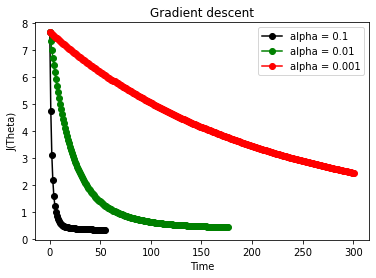

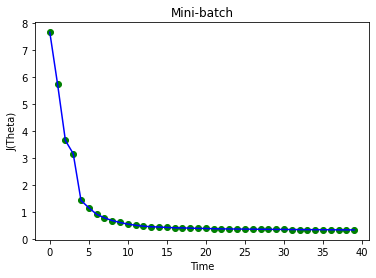

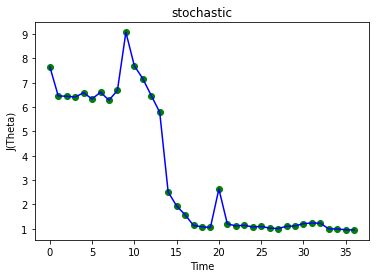

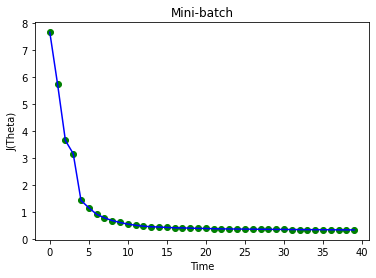

mini_batch took 2.823992 seconds


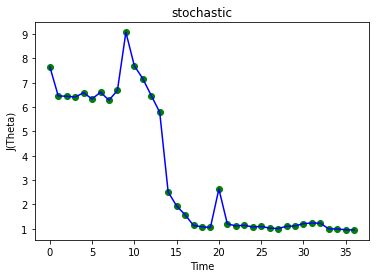

stochastic took 1.909587 seconds


In [21]:

import numpy as np
from matplotlib import pyplot as plt
import time
# read data from csv file to matrix
my_data = np.genfromtxt('cancer_data.csv', delimiter=',')
# print(my_data)
m = len(my_data) #row_Size=3047
col_Size = len(my_data[0]) #col_size=10
y = np.ones((m, 1)) #creat vector of ones with size row_Size 
x = np.ones((m, col_Size)) # now i heve matrix of ones with size of my_data
Epsilon=0.001
Delta=0.001
ITERATIONS = 300
E = 1e-8

# 1 - create matrix x and vector y
def init(data):
    for i in range(m):
        for j in range(col_Size - 1):
            x[i][j+1] = data[i][j]
        y[i] = data[i][col_Size - 1]
 # 1.a 
def normal(data):
    
     transX = np.copy(data.T)
     for j in range(col_Size):
         for i in range(m):
             if np.var(transX[j]) == 0:
                 continue
             data[i][j] = (transX[j][i] - np.average(transX[j])) / np.sqrt(np.var(transX[j]))
    #  print (data)

# 1.b
def h_function(theta, x_i):
    return np.dot(x_i, theta)
# 1.c
def price_function(theta, x_matrix, y_vector):#1/2m*(h(X)-y)^2
    error = 0
    for i in range(m):
        error += np.square(h_function(theta, x_matrix[i]) - y_vector[i]) #(h(X)-y))^2
    return error / (2 *m)

# 1.d
def grad_function(theta, x_matrix, y_vector):
    grad = np.zeros((col_Size, 1))
    for j in range(col_Size):
        for i in range(m):
          grad[j] +=(h_function(theta, x_matrix[i]) - y_vector[i]) * x_matrix[i][j]
        grad[j] /= m
    return grad

# 1.e
def gradientDescent(x_matrix, y_vector, alpha):
    theta_k = np.ones((col_Size, 1))
    theta_k_plus_1 = np.copy(theta_k)
    cost = []
    index = 0
    while True:
        grad= grad_function(theta_k, x_matrix, y_vector)
        for j in range(col_Size):
            theta_k_plus_1[j] = theta_k[j] - alpha * grad[j] # theta[k+1]=theta[k]-a*grad_function()
        cost.append(price_function(theta_k, x_matrix, y_vector))
        # Stop conditions
        if np.linalg.norm(theta_k_plus_1 - theta_k) < Epsilon \
                or np.absolute( price_function(theta_k_plus_1, x_matrix, y_vector) -  price_function(theta_k, x_matrix, y_vector)) < Delta \
                or index > NUM_OF_ITERATIONS:
            break
        index += 1
        theta_k = np.copy(theta_k_plus_1) #theta[k]=thteta[k+1]
    return theta_k_plus_1, cost

 # 1.f
def mini_batch(matrix_x, vector_y, alpha, n):
      k = 0
      cost = []
      theta_k = np.ones((col_Size, 1))
      theta_k_plus_1 = np.copy(theta_k)
      while True:
          for j in range(col_Size):
              for i in range(k * n, ((k + 1) * n - 1)):
                  newI = i % m
                  theta_k_plus_1[j] = theta_k_plus_1[j] - matrix_x[newI][j] * (alpha/n) *  (h_function(theta_k, matrix_x[newI]) - vector_y[newI])
          cost.append(price_function(theta_k, matrix_x, vector_y))
          if np.linalg.norm(theta_k_plus_1 - theta_k) < Epsilon \
                  or np.absolute(price_function(theta_k_plus_1, matrix_x, vector_y) - price_function(theta_k, matrix_x, vector_y)) < Delta \
                  or k > ITERATIONS:
              break
          k += 1
          theta_k = np.copy(theta_k_plus_1)
      plt.plot(cost, 'ro', color='green')
      plt.ylabel('J(Theta)')
      plt.xlabel('Time')
      plt.plot(cost,'b')
      plt.title("Mini-batch")
      plt.show()
      return theta_k_plus_1
 
def stochastic(matrix_x, vector_y, alpha, n):
    k = 0
    i=1
    cost = []
    theta_k = np.ones((col_Size, 1))
    theta_k_plus_1 = np.copy(theta_k)
    while True:
        for j in range(col_Size):
               
                theta_k_plus_1[j] = theta_k_plus_1[j] - matrix_x[i][j] * (alpha) * (h_function(theta_k, matrix_x[i]) - vector_y[i])
        cost.append(price_function(theta_k, matrix_x, vector_y))
        #stop condtion
        if np.linalg.norm(theta_k_plus_1 - theta_k) < Epsilon \
                or np.absolute(price_function(theta_k_plus_1, matrix_x, vector_y) - price_function(theta_k, matrix_x, vector_y)) < Delta \
                or k > ITERATIONS:
            break
        k += 1
        i += 1
        theta_k = np.copy(theta_k_plus_1)
    plt.plot(cost, 'ro', color='green')
    plt.ylabel('J(Theta)')
    plt.xlabel('Time')
    plt.plot(cost, 'b')
    plt.title("stochastic")
    plt.show()
    return theta_k_plus_1 

def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic



if __name__ == '__main__':

    normal(my_data)
    init(my_data)

    theta_01, graph_1 = gradientDescent(x, y, 0.1)
    theta_001, graph_2 = gradientDescent(x, y, 0.01)
    theta_0001, graph_3 = gradientDescent(x, y, 0.001)

    plt.ylabel('J(Theta)')
    plt.xlabel('Time')
    plt.plot(graph_1, 'ro-', color='black', label='alpha = 0.1')
    plt.plot(graph_2, 'ro-', color='green', label='alpha = 0.01')
    plt.plot(graph_3, 'ro-', color='red', label='alpha = 0.001')
    plt.title("Gradient descent")
    plt.legend(loc='upper right')
    plt.show()

    theta_mb = mini_batch(x, y, 0.1, 300)
    theta_stochastic = stochastic(x, y, 0.1, 300) 
 
    two_loop_time = time_function(mini_batch,x, y, 0.1, 300)
    print('mini_batch took %f seconds' % two_loop_time)

    one_loop_time = time_function(stochastic,x, y, 0.1, 300)
    print('stochastic took %f seconds' % one_loop_time)


